# *DATA PROCESSING*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle

In [2]:
df = pd.read_csv(r"E:\IT\aimlsmartBridge\PS_20174392719_1491204439457_log.csv")

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
# Shape of csv data
df.shape

(6362620, 11)

In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df.drop(['isFlaggedFraud'],axis = 1,inplace = True)

In [7]:
df.drop(['nameOrig','nameDest'],axis = 1,inplace = True)
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [8]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [9]:
df.isnull().sum()

step              0
type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 388.3+ MB


<Axes: ylabel='amount'>

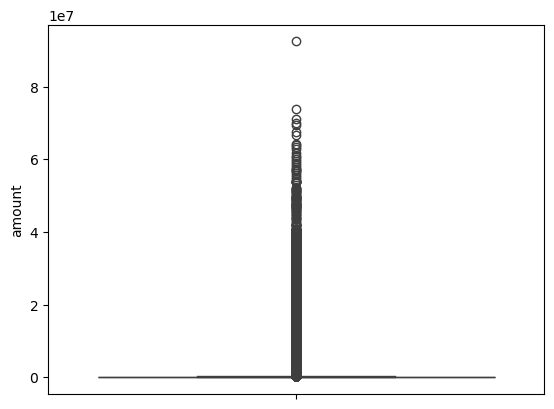

In [11]:
sns.boxplot(df['amount'])

In [12]:
from scipy import stats
print(stats.mode(df['amount']))
print(np.mean(df['amount']))

ModeResult(mode=np.float64(10000000.0), count=np.int64(3207))
179861.90354913071


In [13]:
q1 = np.quantile (df['amount'],0.25)
q3 = np.quantile(df['amount'], 0.75)
IQR = q3-q1
upper_bound = q3+(1.5*IQR)
lower_bound = q1-(1.5*IQR)
print('q1: ',q1)
print('q3: ',q3)
print('IQR: ', IQR)
print('Upper Bound: ', upper_bound)
print('Lower Bound: ', lower_bound)
print('Skewed data: ', len(df[df['amount']>upper_bound]))
print('Skewed data: ', len(df[df['amount']<lower_bound]))

q1:  13389.57
q3:  208721.4775
IQR:  195331.9075
Upper Bound:  501719.33875
Lower Bound:  -279608.29125
Skewed data:  338078
Skewed data:  0


In [14]:
#To handle outliers transformation techniques are used.
def transformationPlot(feature):
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    sns.histplot(feature)
    plt.subplot(1,2,2)
    stats.probplot(feature, plot=plt)

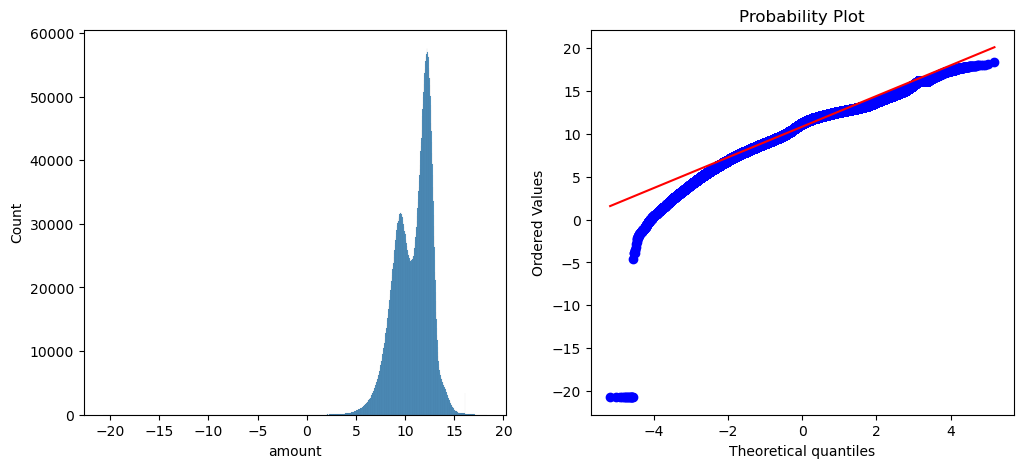

In [15]:
transformationPlot(np.log(df['amount'] + 1e-9))

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

def transformationPlot(feature):
    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    sns.histplot(feature, kde=True)

    plt.subplot(1,2,2)
    stats.probplot(feature, plot=plt)

    plt.show()

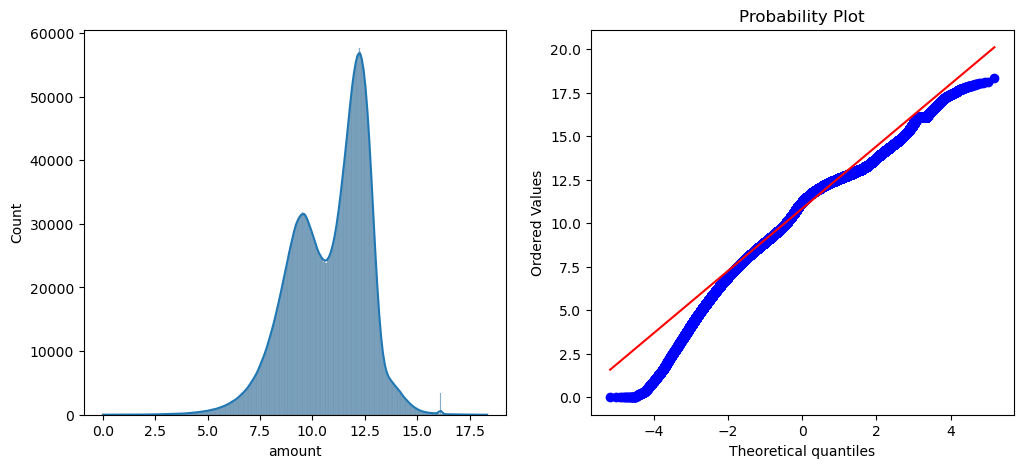

In [17]:
log_amount = np.log(df['amount'] + 1)
log_amount = log_amount.replace([np.inf, -np.inf], np.nan).dropna()

transformationPlot(log_amount)

In [18]:
df['amount'] = np.log(df['amount'] + 1e-9)

In [19]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
df['type'] = la.fit_transform(df['type'])

In [20]:
df['type'].value_counts()

type
1    2237500
3    2151495
0    1399284
4     532909
2      41432
Name: count, dtype: int64

In [21]:
df['isFraud'] = np.where(df['isFraud'] == 0.0, 'is not Fraud', 'Fraud')

In [22]:
df.dropna(subset=['isFraud'], inplace=True)
x = df.drop('isFraud',axis = 1)
y = df['isFraud']

In [23]:
x

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,1,3,9.194174,170136.00,160296.36,0.00,0.00
1,1,3,7.530630,21249.00,19384.72,0.00,0.00
2,1,4,5.198497,181.00,0.00,0.00,0.00
3,1,1,5.198497,181.00,0.00,21182.00,0.00
4,1,3,9.364617,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...,...,...
6362615,743,1,12.735766,339682.13,0.00,0.00,339682.13
6362616,743,4,15.657870,6311409.28,0.00,0.00,0.00
6362617,743,1,15.657870,6311409.28,0.00,68488.84,6379898.11
6362618,743,4,13.652995,850002.52,0.00,0.00,0.00


In [24]:
y

0          is not Fraud
1          is not Fraud
2                 Fraud
3                 Fraud
4          is not Fraud
               ...     
6362615           Fraud
6362616           Fraud
6362617           Fraud
6362618           Fraud
6362619           Fraud
Name: isFraud, Length: 6362620, dtype: object

In [25]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0,test_size = 0.2)

In [26]:
print(x_train.shape)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)

(5090096, 7)
(1272524, 7)
(1272524,)
(5090096,)


# *Model Building*

## Random Forest Classifier

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

y_test_predict1 = rfc.predict(x_test)
test_accuracy = accuracy_score(y_test,y_test_predict1)
test_accuracy

0.999711596795031

In [28]:
y_train_predict1 = rfc.predict(x_train)
train_accuracy=accuracy_score(y_train,y_train_predict1)
train_accuracy

0.9999998035400511

In [29]:
pd.crosstab(y_test,y_test_predict1)

col_0,Fraud,is not Fraud
isFraud,,
Fraud,1302,339
is not Fraud,28,1270855


In [30]:
print(classification_report(y_test,y_test_predict1))

              precision    recall  f1-score   support

       Fraud       0.98      0.79      0.88      1641
is not Fraud       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [54]:
import pickle
pickle.dump(rfc, open('rfc_model.pkl', 'wb'))

## Desicion Tree Classifier

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_test_predict2 = dtc.predict(x_test)
test_accuracy-accuracy_score(y_test,y_test_predict2)
test_accuracy

0.999711596795031

In [32]:
y_train_predict2=dtc.predict(x_train)
train_accuracy-accuracy_score(y_train,y_train_predict2)
train_accuracy

0.9999998035400511

In [33]:
pd.crosstab(y_test,y_test_predict2)

col_0,Fraud,is not Fraud
isFraud,,
Fraud,1445,196
is not Fraud,175,1270708


In [34]:
print(classification_report(y_test,y_test_predict2))

              precision    recall  f1-score   support

       Fraud       0.89      0.88      0.89      1641
is not Fraud       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



In [55]:
import pickle
pickle.dump(dtc, open('dtc_model.pkl', 'wb'))

## ExtraTrees Classifier

In [35]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train,y_train)
y_test_predict3 = etc.predict(x_test)
test_accuracy = accuracy_score(y_test,y_test_predict3)
test_accuracy

0.999704524236871

In [36]:
y_train_predict3 = etc.predict(x_train)
train_accuracy = accuracy_score(y_train,y_train_predict3)
train_accuracy

1.0

In [56]:
import pickle
pickle.dump(etc, open('etc_model.pkl', 'wb'))


## Support Vector Machine Classifier

In [37]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc= SVC()
svc.fit(x_train, y_train)
y_test_predict4 = svc.predict(x_test)
test_accuracy = accuracy_score(y_test,y_test_predict4)
test_accuracy

0.9991481496616174

In [38]:
y_train_predict4 = svc.predict(x_train)
train_accuracy = accuracy_score(y_train,y_train_predict4)
train_accuracy

0.9991703496358418

In [39]:
pd.crosstab(y_test,y_test_predict4)

col_0,Fraud,is not Fraud
isFraud,,
Fraud,564,1077
is not Fraud,7,1270876


In [40]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_test_predict4))

              precision    recall  f1-score   support

       Fraud       0.99      0.34      0.51      1641
is not Fraud       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272524
   macro avg       0.99      0.67      0.75   1272524
weighted avg       1.00      1.00      1.00   1272524



In [41]:
df.columns

Index(['step', 'type', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [42]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
y_train1 = la.fit_transform(y_train)
y_test1 = la.fit_transform(y_test)

In [43]:
y_test1 = la.transform(y_test)
print(y_test1)

[1 1 1 ... 1 1 1]


In [44]:
y_train1

array([1, 1, 1, ..., 1, 1, 1], shape=(5090096,))

## XGBoost Classifier

In [82]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train,y_train1)

y_test_predict5 = xgb1.predict(x_test)
test_accuracy = accuracy_score(y_test1,y_test_predict5)
test_accuracy

0.9984998318302838

In [83]:
y_train_predict5 = xgb1.predict(x_train)
train_accuracy=accuracy_score(y_train1,y_train_predict5)
train_accuracy

0.9984776318560593

In [66]:
pd.crosstab(y_test1,y_test_predict5)

col_0,0,1
row_0,,
0,535,1106
1,803,1270080


In [88]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test1,y_test_predict5))

              precision    recall  f1-score   support

           0       0.40      0.33      0.36      1641
           1       1.00      1.00      1.00   1270883

    accuracy                           1.00   1272524
   macro avg       0.70      0.66      0.68   1272524
weighted avg       1.00      1.00      1.00   1272524



In [93]:
import pickle
pickle.dump(xgb1, open('xgb_model.pkl', 'wb'))

# Model Comparing

In [90]:
def compareModel():
  print("Train accuracy for rfc: ",accuracy_score(y_train,y_train_predict1))
  print("Test accuracy for rfc: ",accuracy_score(y_test,y_test_predict1))
  print("Train accuracy for dtc: ",accuracy_score(y_train,y_train_predict2))
  print("Test accuracy for dtc: ",accuracy_score(y_test,y_test_predict2))
  print("Train accuracy for etc: ",accuracy_score(y_train,y_train_predict3))
  print("Test accuracy for etc: ",accuracy_score(y_test,y_test_predict3))
  print("Train accuracy for svc: ",accuracy_score(y_train,y_train_predict4))
  print("Test accuracy for svc: ",accuracy_score(y_test,y_test_predict4))
  print("Train accuracy for xgb: ",accuracy_score(y_train1,y_train_predict5))
  print("Test accuracy for xgb: ",accuracy_score(y_test1,y_test_predict5))


In [91]:
compareModel()

Train accuracy for rfc:  0.9999998035400511
Test accuracy for rfc:  0.999711596795031
Train accuracy for dtc:  1.0
Test accuracy for dtc:  0.9997084534358488
Train accuracy for etc:  1.0
Test accuracy for etc:  0.999704524236871
Train accuracy for svc:  0.9991703496358418
Test accuracy for svc:  0.9991481496616174
Train accuracy for xgb:  0.9984776318560593
Test accuracy for xgb:  0.9984998318302838


# Evaluating Performance of the Model and Saving the Model

In [51]:
# #from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score
# svc= SVC()
# svc.fit(x_train, y_train)
# y_test_predict4 = svc.predict(x_test)
# test_accuracy = accuracy_score(y_test,y_test_predict4)
# test_accuracy

In [52]:
# y_train_predict4 = svc.predict(x_train)
# train_accuracy = accuracy_score(y_train,y_train_predict4)
# train_accuracy

In [ ]:
import pickle
pickle.dump(svc,open('model.pkl','wb'))

In [60]:
import pickle
pickle.dump(svc,open('svc_model.pkl','wb'))